### 信用卡欺诈检测 Credit Card Fraud Detection

基于信用卡交易记录数据，本项目旨在构建一个分类模型，以预测哪些交易记录是异常的，哪些是正常的。
Based on credit card transaction data, this project aims to build a classification model to predict which transactions are fraudulent and which are normal.

#### 任务流程 Workflow:
- 加载数据，观察问题 Load data and observe issues
- 针对问题给出解决方案 Propose solutions for the issues
- 数据集切分 Split the dataset
- 评估方法对比 Compare evaluation methods
- 逻辑回归模型 Logistic regression model
- 建模结果分析 Analyze modeling results
- 方案效果对比 Compare the effects of solutions

#### 主要解决问题 Key Issues Addressed:
1. 数据观察与问题识别 Data Observation and Issue Identification:
   - 在本项目中，我们首先对数据进行观察，发现样本不均衡问题。在开始任务工作之前，必须先检查数据，以针对发现的问题选择解决方案。
   - In this project, we first observed the data and identified the issue of imbalanced samples. Before starting the task, it is essential to check the data to select appropriate solutions for identified issues.

2. 解决方案对比 Solution Comparison:
   - 提出下采样和过采样两种方法，对比实验效果。我们通常会比较多种方法，找到最合适的解决方案。
   - We proposed two methods, undersampling and oversampling, to compare the experimental effects. Usually, we compare various methods to find the most suitable solution.

3. 数据预处理 Data Preprocessing:
   - 在建模前进行数据标准化、缺失值填充等预处理操作。虽然未深入特征工程，数据预处理仍是任务中极为重要的阶段。
   - Data standardization, missing value imputation, and other preprocessing tasks are conducted before modeling. Although not delving into feature engineering, data preprocessing remains a critical phase in the task.

4. 评估方法选择 Evaluation Method Selection:
   - 先确定评估方法，再进行建模。我们需要有适当的评估方法来迭代改进模型，如召回率、准确率等。
   - Determine the evaluation method before modeling. We need proper evaluation methods, like recall and accuracy, to iteratively improve the model.

5. 算法选择 Algorithm Selection:
   - 使用逻辑回归进行实战练习，并分析其细节。机器学习中并非越复杂的算法越实用，简单的算法如逻辑回归广泛应用于分类问题。
   - Logistic regression is used for practical exercises, and its details are analyzed. In machine learning, more complex algorithms are not necessarily more practical; simple ones like logistic regression are widely used in classification problems.

6. 模型调参 Model Tuning:
   - 通过实验发现参数设置对结果影响较大，调参是提升模型性能的关键步骤。
   - Experiments show that parameter settings significantly affect the results, and tuning is a key step to improve model performance.

7. 实际应用考量 Practical Application Considerations:
   - 将模型结果与实际任务结合，确保测试环节的有效性。理论结果虽好，实际应用的适用性更为关键。
   - Combine model results with practical tasks and ensure the effectiveness of the testing phase. While theoretical results are good, applicability in real-world applications is crucial. 

通过在实践中学习，我们能够更快地成长。建议大家使用提供的Notebook代码文件亲自完成上述操作，以深化理解。
Learning through practice enables us to grow faster. It is recommended to use the provided Notebook code file to complete the above operations personally, deepening understanding.

In [1]:
#导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#观察数据
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


/tmp/ipykernel_35985/3515168996.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True).sort_index()


<Axes: xlabel='Class'>

Text(0.5, 1.0, 'Fraud Class histogram')

Text(0.5, 0, 'class')

Text(0, 0.5, 'Frequency')

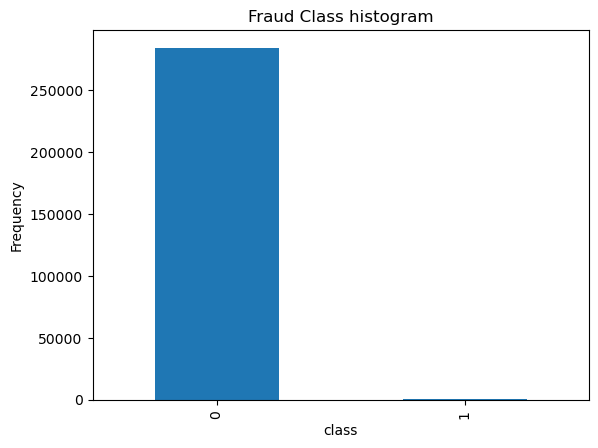

In [3]:
#通过matplotlib可视化分类数据，观察到1的样本过少
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud Class histogram")
plt.xlabel("class")
plt.ylabel("Frequency")

In [4]:
from sklearn.preprocessing import StandardScaler

# 对 'Amount' 列进行标准化处理
# reshape(-1, 1) 是因为 fit_transform 需要二维数组作为输入
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# 删除原始的 'Time' 和 'Amount' 列
data = data.drop(['Time', 'Amount'], axis=1)

# 显示处理后的数据前几行
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
#下采样的数据处理方案
#X为特征值，Y为标签
X = data.loc[:, data.columns != 'Class']
Y = data.loc[:, data.columns == 'Class']
#得到所有异常样本的索引
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)
#得到所有正常样本的索引
normal_indices = data[data.Class == 0].index
#下采样到异常样本数量
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
#获取所有索引
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
#根据索引得到下采样的所有样本点
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
Y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']
#打印下采样策略的正负样本比例
print("正常样本所占整体比例：", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常样本所占整体比例：", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("下采样总样本数量：", len(under_sample_data))

正常样本所占整体比例： 0.5
异常样本所占整体比例： 0.5
下采样总样本数量： 984


In [6]:
#导入数据集切分模块
from sklearn.model_selection import train_test_split
#对整个数据集进行切分，X为特征数据，Y为标签，test_size为测试集比例，random_state为随机种子，目的是使每次随机结果一致
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("原始训练集包含样本数量：", len(X_train))
print("原始测试集包含样本数量：", len(X_test))
print("原始样本总数：", len(X_train) + len(X_test))
#下采样后的数据划分
X_train_undersample, X_test_undersample, Y_train_undersample, Y_test_undersample = train_test_split(X_undersample, Y_undersample, test_size = 0.3, random_state = 0)
print("下采样训练集包含样本数量：", len(X_train_undersample))
print("下采样测试集包含样本数量：", len(X_test_undersample))
print("下采样样本总数：：", len(X_train_undersample) + len(X_test_undersample))

原始训练集包含样本数量： 199364
原始测试集包含样本数量： 85443
原始样本总数： 284807
下采样训练集包含样本数量： 688
下采样测试集包含样本数量： 296
下采样样本总数：： 984


In [26]:
# 导入所需的库
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, classification_report

# 定义一个函数来打印K折交叉验证的分数
def printing_Kfold_scores(X_train_data, Y_train_data):
    # 定义K折交叉验证方法，这里分成5个部分
    fold = KFold(n_splits=5, shuffle=False)
    # 定义正则化强度的范围
    c_param_range = [0.01, 0.1, 1, 10, 100]

    # 创建一个DataFrame来保存每个正则化强度的召回率
    results_table = pd.DataFrame(index = range(len(c_param_range)), columns = ['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range

    j = 0
    # 遍历不同的正则化强度
    for c_param in c_param_range:
        print("----------------------")
        print("正则化惩罚力度：", c_param)
        print("----------------------")
        print("")

        recall_accs = []

        # 进行K折交叉验证
        for iteration, indices in enumerate(fold.split(X_train_data)):
            # 实例化LogisticRegression模型，使用l1正则化
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver = 'liblinear')
            # 训练模型
            lr.fit(X_train_data.iloc[indices[0]], Y_train_data.iloc[indices[0]].values.ravel())
            # 预测
            Y_pred_undersample = lr.predict(X_train_data.iloc[indices[1]])
            # 计算召回率
            recall_acc = recall_score(Y_train_data.iloc[indices[1]].values.ravel(), Y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration:', iteration, '，召回率：', recall_acc)
        
        # 计算并保存每个正则化强度的平均召回率
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print("")
        print("平均召回率：", np.mean(recall_accs))
        print("")

    # 找出平均召回率最高的正则化强度
    best_c = results_table.loc[results_table['Mean recall score'].astype('float64').idxmax()]['C_parameter']
    print("*************************")
    print("效果最好的模型参数 = ", best_c)
    print("*************************")
    return best_c

# 调用函数
best_c = printing_Kfold_scores(X_train_undersample, Y_train_undersample)


----------------------
正则化惩罚力度： 0.01
----------------------

Iteration: 0 ，召回率： 0.9315068493150684
Iteration: 1 ，召回率： 0.9452054794520548
Iteration: 2 ，召回率： 0.9830508474576272
Iteration: 3 ，召回率： 0.972972972972973
Iteration: 4 ，召回率： 0.9696969696969697

平均召回率： 0.9604866237789386

----------------------
正则化惩罚力度： 0.1
----------------------

Iteration: 0 ，召回率： 0.8493150684931506
Iteration: 1 ，召回率： 0.863013698630137
Iteration: 2 ，召回率： 0.9152542372881356
Iteration: 3 ，召回率： 0.9459459459459459
Iteration: 4 ，召回率： 0.9090909090909091

平均召回率： 0.8965239718896557

----------------------
正则化惩罚力度： 1
----------------------

Iteration: 0 ，召回率： 0.863013698630137
Iteration: 1 ，召回率： 0.8904109589041096
Iteration: 2 ，召回率： 0.9661016949152542
Iteration: 3 ，召回率： 0.9459459459459459
Iteration: 4 ，召回率： 0.9090909090909091

平均召回率： 0.9149126414972711

----------------------
正则化惩罚力度： 10
----------------------

Iteration: 0 ，召回率： 0.863013698630137
Iteration: 1 ，召回率： 0.8904109589041096
Iteration: 2 ，召回率： 0.983050847457627

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

召回率： 0.9387755102040817


/Users/ling/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

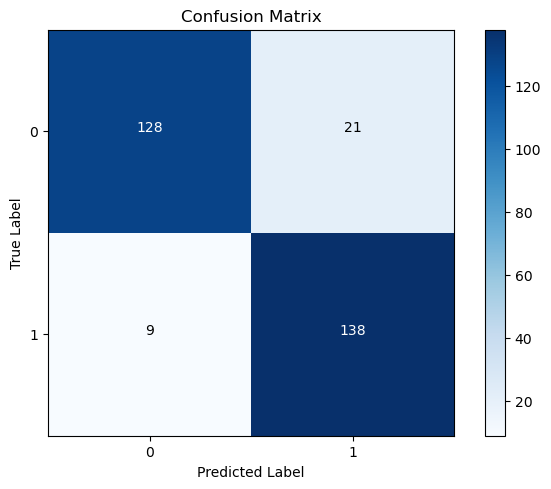

In [27]:
import itertools
def plot_confusion_matrix(cm, classes, title = "Confusion Matrix", cmap = plt.cm.Blues):
    #绘制混淆矩阵
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
lr = LogisticRegression(C = best_c, penalty = 'l1', solver = 'liblinear')
lr.fit(X_train_undersample, Y_train_undersample.values.ravel())
Y_pred_undersample = lr.predict(X_test_undersample.values)
#计算所需值
cnf_matrix = confusion_matrix(Y_test_undersample, Y_pred_undersample)
np.set_printoptions(precision = 2)
print("召回率：", cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1]))
#绘制矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = "Confusion Matrix")
plt.show()

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

Recall metric in the testing dataset:  0.9251700680272109


/Users/ling/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

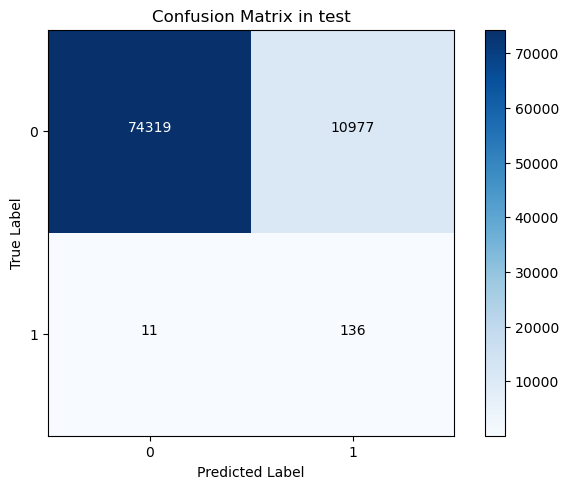

In [20]:
#用测试集绘制混淆矩阵
lr = LogisticRegression(C = best_c, penalty = 'l1', solver = 'liblinear')
lr.fit(X_train_undersample, Y_train_undersample.values.ravel())
Y_pred = lr.predict(X_test.values)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision = 2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1] / (cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = "Confusion Matrix in test")
plt.show()

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

/Users/ling/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

<Axes: >

给定阈值为: 0.1 时测试集召回率:  1.0


<Axes: >

给定阈值为: 0.2 时测试集召回率:  1.0


<Axes: >

给定阈值为: 0.3 时测试集召回率:  1.0


<Axes: >

给定阈值为: 0.4 时测试集召回率:  0.9863945578231292


<Axes: >

给定阈值为: 0.5 时测试集召回率:  0.9387755102040817


<Axes: >

给定阈值为: 0.6 时测试集召回率:  0.8979591836734694


<Axes: >

给定阈值为: 0.7 时测试集召回率:  0.8367346938775511


<Axes: >

给定阈值为: 0.8 时测试集召回率:  0.782312925170068


<Axes: >

给定阈值为: 0.9 时测试集召回率:  0.5986394557823129


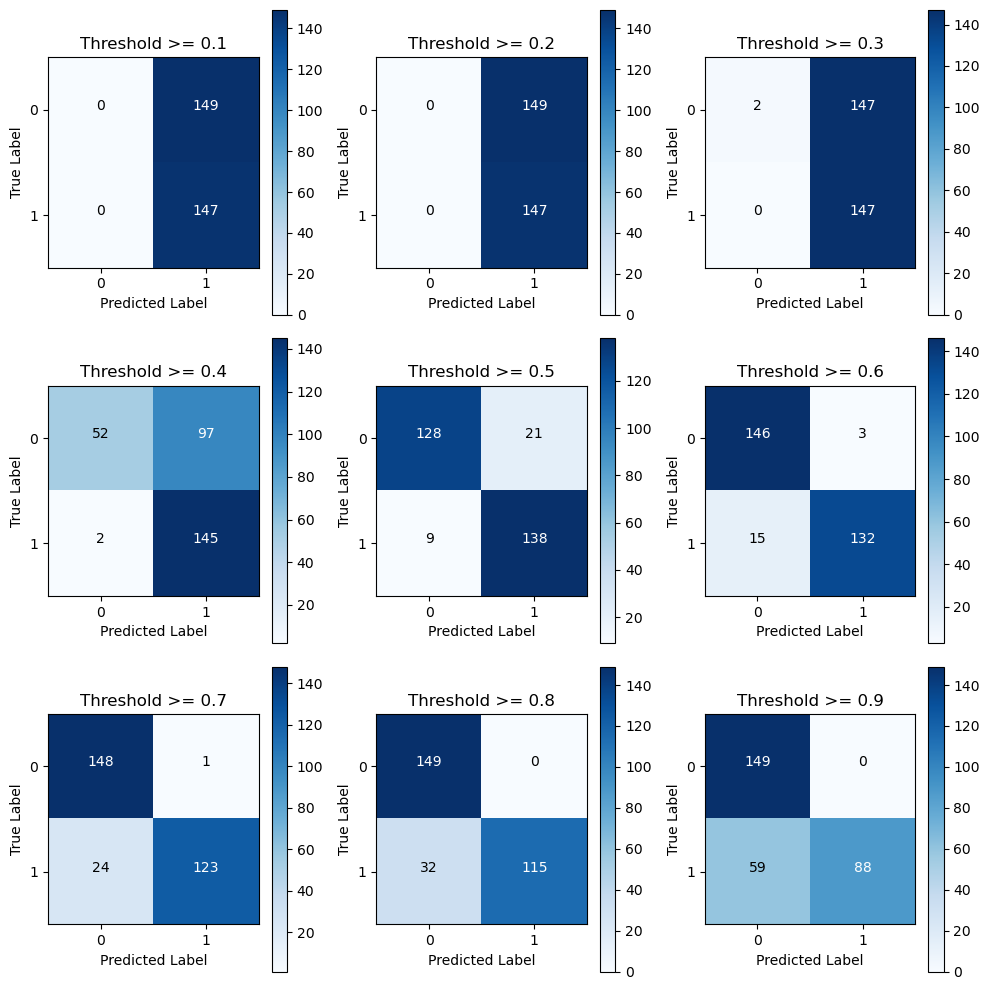

In [19]:
# 用之前最好的参数来进行建模
lr = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear')

# 训练模型，还是用下采样的数据集
lr.fit(X_train_undersample,Y_train_undersample.values.ravel())

# 得到预测结果的概率值
Y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

#指定不同的阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1

# 用混淆矩阵来进行展示
for i in thresholds:
    Y_test_predictions_high_recall = Y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(Y_test_undersample,Y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("给定阈值为:",i,"时测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

# SMOTE过采样方案

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [24]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
# 在特征中去除掉标签
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3, 
                                                                            random_state=0)

In [29]:
def printing_Kfold_scores(X_train_data, Y_train_data):
    fold = KFold(n_splits=5, shuffle=False)
    c_param_range = [0.01, 0.1, 1, 10, 100]
    results_table = pd.DataFrame(index = range(len(c_param_range)), columns = ['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
    j = 0
    for c_param in c_param_range:
        print("----------------------")
        print("正则化惩罚力度：", c_param)
        print("----------------------")
        print("")
        recall_accs = []
        for iteration, indices in enumerate(fold.split(X_train_data)):
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver = 'liblinear')
            lr.fit(X_train_data.iloc[indices[0]], Y_train_data.iloc[indices[0]].values.ravel())
            Y_pred_undersample = lr.predict(X_train_data.iloc[indices[1]])
            recall_acc = recall_score(Y_train_data.iloc[indices[1]].values.ravel(), Y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration:', iteration, '，召回率：', recall_acc)
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print("")
        print("平均召回率：", np.mean(recall_accs))
        print("")
    best_c = results_table.loc[results_table['Mean recall score'].astype('float64').idxmax()]['C_parameter']
    print("*************************")
    print("效果最好的模型参数 = ", best_c)
    print("*************************")
    return best_c

oversample = SMOTE(random_state=0)
os_features, os_labels = oversample.fit_resample(features_train, labels_train)
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

----------------------
正则化惩罚力度： 0.01
----------------------

Iteration: 0 ，召回率： 0.9142857142857143
Iteration: 1 ，召回率： 0.88
Iteration: 2 ，召回率： 0.9716742539200809
Iteration: 3 ，召回率： 0.9601793812101951
Iteration: 4 ，召回率： 0.961963143944628

平均召回率： 0.9376204986721236

----------------------
正则化惩罚力度： 0.1
----------------------

Iteration: 0 ，召回率： 0.9142857142857143
Iteration: 1 ，召回率： 0.88
Iteration: 2 ，召回率： 0.9729135053110773
Iteration: 3 ，召回率： 0.963809715226048
Iteration: 4 ，召回率： 0.9641237579609834

平均召回率： 0.9390265385567647

----------------------
正则化惩罚力度： 1
----------------------

Iteration: 0 ，召回率： 0.9142857142857143
Iteration: 1 ，召回率： 0.88
Iteration: 2 ，召回率： 0.9730652503793626
Iteration: 3 ，召回率： 0.9643624304395342
Iteration: 4 ，召回率： 0.9644378006959187

平均召回率： 0.939230239160106

----------------------
正则化惩罚力度： 10
----------------------

Iteration: 0 ，召回率： 0.9142857142857143
Iteration: 1 ，召回率： 0.88
Iteration: 2 ，召回率： 0.9730905412240769
Iteration: 3 ，召回率： 0.9644378006959187
Iteration: 4 ，召

LogisticRegression(penalty='l1', solver='liblinear')

召回率:  0.891156462585034


/Users/ling/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

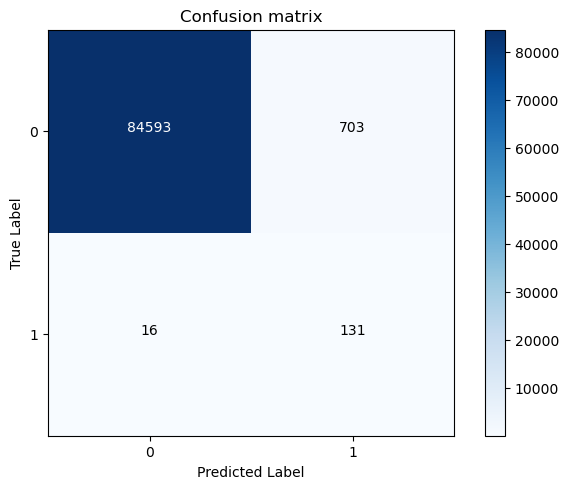

In [32]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### 项目总结 Project Summary

本项目通过实现一个基于逻辑回归的信用卡欺诈检测模型，深入探讨了机器学习在实际应用中的关键步骤和策略。我们从数据观察开始，发现并解决了样本不均衡问题，并通过比较下采样和过采样方法来优化模型性能。

This project delved into the key steps and strategies of machine learning in practical application by implementing a credit card fraud detection model based on logistic regression. Starting with data observation, we identified and addressed the issue of sample imbalance, and optimized model performance by comparing undersampling and oversampling methods.

重点强调了数据预处理的重要性，包括数据标准化和缺失值填充等，这些是确保模型效能的基础工作。同时，选择合适的评估方法和算法对于建立高效的模型至关重要。我们采用逻辑回归算法，强调了即使是简单的模型也能有效解决复杂问题。

The importance of data preprocessing, including data standardization and missing value imputation, was emphasized, forming the groundwork to ensure model efficacy. Also, choosing appropriate evaluation methods and algorithms is crucial for developing efficient models. The logistic regression algorithm was employed, highlighting that even simple models can effectively solve complex problems.

此外，模型调参被证明对提高预测精度有显著影响。项目的最终阶段，我们将理论结果与实际应用结合，进行了彻底的测试，确保模型的实际应用价值。

Moreover, model tuning was proven to significantly impact improving prediction accuracy. In the final stage of the project, theoretical results were combined with practical applications, and thorough testing was conducted to ensure the practical value of the model.

通过本项目，我们不仅掌握了机器学习的技术细节，还学会了如何将理论知识应用于解决现实世界的问题。这强调了机器学习项目成功的关键不仅在于算法选择和技术实现，还在于对实际问题的深入理解和适当的解决方案选择。

Through this project, we not only mastered the technical details of machine learning but also learned how to apply theoretical knowledge to solve real-world problems. This emphasizes that the key to the success of machine learning projects lies not only in the choice of algorithms and technical implementation but also in a deep understanding of practical issues and appropriate solution selection.